# Week 4
## Case Study 5: Bird Migration
## Video 4.2.1: Introduction to GPS Tracking of Birds

In this case study, we will manipulate, examining, and visualizing GPS data used for tracking birds. The data for this case study comes from the LifeWatch INBO project. We will use a small data set that consists of migration data for three gulls named Eric, Nico, and Sanne.  
The CSV file contains eight columns and includes variables
like latitude, longitude, altitude, and time stamps.
In this case study, we will first load the data,
visualize some simple flight trajectories,
track flight speed, learn about daytime and much more.


In [70]:
# import modules:
import pandas as pd

In [71]:
# import data
bird_data = pd.read_csv('res/data/bird_tracking.csv')

# Prit basic infor about the data and file head (top 5 rows)
print(bird_data.info())
print('\n')
print(bird_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB
None


   altitude               date_time  device_info_serial   direction  \
0        71  2013-08-15 00:18:08+00                 851 -150.469753   
1        68  2013-08-15 00:48:07+00                 851 -136.151141   
2        68  2013-08-15 01:17:58+00                 851  160.797477   
3        73  2013-08-15 01:47:51+00                 851   32.769360   
4        69  2013-08-15 02:17:42+00                 851   45.191230   

    latitude  longitude  speed_2d bird_nam

## Video 4.2.2: Simple Data Visualizations

We will get started by simply plotting the latitude and longitude of a flight
trajectory for a single bird in a standard two-dimensional plot.
Latitude and longitude are coordinates along the surface of a sphere, where a standard 2-D plot is a plane
so we would expect very strong distortions
for the flight trajectories.
This is especially true because the trajectories
cover a large spatial region.  
We'll be doing an actual cartographic projection later in this case study.

In [72]:
# import modules:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
# import data
bird_data = pd.read_csv('res/data/bird_tracking.csv')

ix = bird_data.bird_name == 'Eric'

x, y = bird_data.longitude[ix], bird_data.latitude[ix]

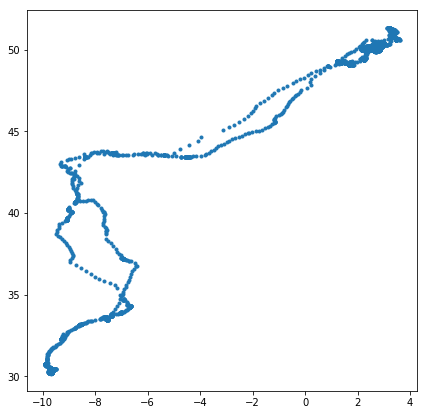

In [74]:
plt.figure(figsize=(7,7))
plt.plot(x,y,'.')
plt.savefig('res/img/Eric_trajectory.png') # save the plot (optional)

Plot all three birds on the single plot

In [75]:
bird_names = pd.unique(bird_data.bird_name)
print(bird_names)

['Eric' 'Nico' 'Sanne']


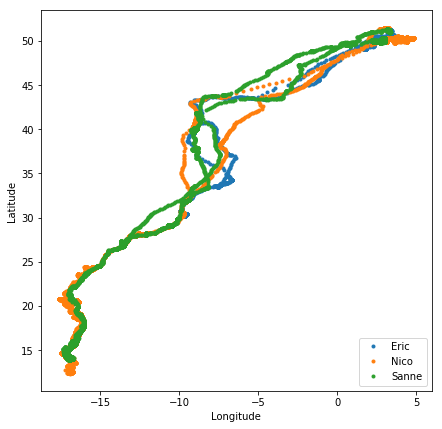

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize=(7,7))

for bird_name in bird_names:
    ix = bird_data.bird_name == bird_name
    x, y = bird_data.longitude[ix], bird_data.latitude[ix]
    plt.plot(x,y,'.', label = bird_name)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right')
plt.savefig('res/img/BirdMigration.png')
plt.figure();

## Video 4.2.3: Examining Flight Speed

Text(0,0.5,'Frequency')

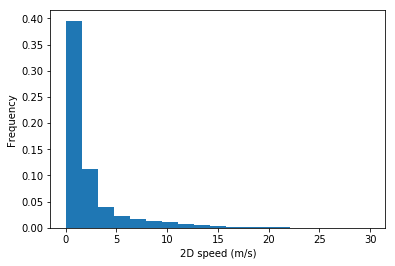

In [77]:
# import modules:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import data
bird_data = pd.read_csv('res/data/bird_tracking.csv')

# take only Eric data:
ix = bird_data.bird_name == 'Eric'

# extract the speed data:
speed = bird_data.speed_2d[ix]

# is any data non-numeric?
np.isnan(speed).any()

# how many non-numeric data?
np.sum(np.isnan(speed))

# Mahe histogram of only numeric data:
ind = np.isnan(speed) # array of data labled as numeric / nonnumeric 

# density - histogram will be normalized meaning that its integral will be equal 1
# specified bins
plt.hist(speed[~ind], bins=np.linspace(0,30,20), density=True); # plot only numeric data
plt.xlabel('2D speed (m/s)')
plt.ylabel('Frequency')

### Creating the same plot using pandas: 
The benefit of using pandas in this case is that all of the non numerical data handling is happening inside the pandas plot method.

Text(0,0.5,'Frequency')

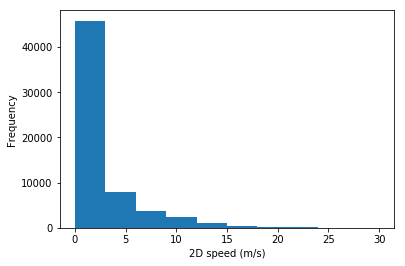

In [78]:
bird_data.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel('2D speed (m/s)')
plt.ylabel('Frequency')

## Video 4.2.4: Using Datetime

We often need to be able to deal with data that has timestamped events,
like our GPS data in this case study. Python's **datetime** is made for dealing with these types of data.

In [79]:
bird_data.date_time.head()

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
3    2013-08-15 01:47:51+00
4    2013-08-15 02:17:42+00
Name: date_time, dtype: object

In [80]:
# import modules:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# import data
bird_data = pd.read_csv('res/data/bird_tracking.csv')

Example of use of datetime in Python:

In [81]:
time_1 = datetime.datetime.today()
time.sleep(1)
time_2 = datetime.datetime.today()

time_delta = time_2 - time_1

print(time_1)
print(time_2)
print(time_delta)

2018-06-29 22:02:45.629284
2018-06-29 22:02:46.629979
0:00:01.000695


If we'd like to compute how much time has passed between any two
observations in our data set, we first have
to convert the timestamps to datetime objects.

In [82]:
date_str = bird_data.date_time[0]
print(type(date_str))

<class 'str'>


In [83]:
# convert string time to datetime object:

'''The first argument is the string, which we would like to turn into a datetime object. The second argument is also a string but in this case the latter string 
specifies the formatting of the first string -Y, M, D, H, M, S format.
'''
datetime1 = datetime.datetime.strptime(date_str[:-3], '%Y-%m-%d %H:%M:%S')

In [84]:
print(datetime1)
print(type(datetime1))

2013-08-15 00:18:08
<class 'datetime.datetime'>


In [85]:
#Convert data in the bird_data dataset to datetime object:

timestamps = []
for k in range(len(bird_data)):
    timestamps.append(datetime.datetime.strptime(bird_data.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S'))
    
print(timestamps[:5])

[datetime.datetime(2013, 8, 15, 0, 18, 8), datetime.datetime(2013, 8, 15, 0, 48, 7), datetime.datetime(2013, 8, 15, 1, 17, 58), datetime.datetime(2013, 8, 15, 1, 47, 51), datetime.datetime(2013, 8, 15, 2, 17, 42)]


In [86]:
# create new timestamp column in the bird_data, pass the data form timestamps list and match its index columns 
bird_data['timestamp'] = pd.Series(timestamps, index = bird_data.index)

print(bird_data.timestamp.head())

0   2013-08-15 00:18:08
1   2013-08-15 00:48:07
2   2013-08-15 01:17:58
3   2013-08-15 01:47:51
4   2013-08-15 02:17:42
Name: timestamp, dtype: datetime64[ns]


In [87]:
# Calculate time laps in Eric's data:

# created times variable containing timestamp data for Eric
times = bird_data.timestamp[bird_data.bird_name == "Eric"]

# Create elapsed_time list containing time elapsed between next timestamps 
elapsed_time = [time-times[0] for time in times]

print(elapsed_time[:10])

[Timedelta('0 days 00:00:00'), Timedelta('0 days 00:29:59'), Timedelta('0 days 00:59:50'), Timedelta('0 days 01:29:43'), Timedelta('0 days 01:59:34'), Timedelta('0 days 02:29:30'), Timedelta('0 days 02:44:25'), Timedelta('0 days 02:59:19'), Timedelta('0 days 03:14:27'), Timedelta('0 days 03:29:40')]


In [88]:
# Measure time in certain units:

# In days:
print('Time elapsed between 0 and 100 timestamp = {} days'
      .format(elapsed_time[100] / datetime.timedelta(days=1)))

# In hours:
print('Time elapsed between 0 and 100 timestamp = {} hours'
      .format(elapsed_time[100] / datetime.timedelta(hours=1)))

# In seconds:
print('Time elapsed between 0 and 100 timestamp = {} seconds'
      .format(elapsed_time[100] / datetime.timedelta(seconds=1)))

Time elapsed between 0 and 100 timestamp = 1.225474537037037 days
Time elapsed between 0 and 100 timestamp = 29.41138888888889 hours
Time elapsed between 0 and 100 timestamp = 105881.0 seconds


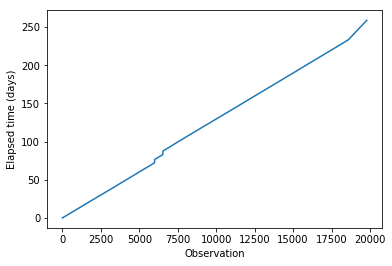

In [89]:
# Plot the elapsed time data:

plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel('Observation')
plt.ylabel('Elapsed time (days)')
plt.savefig('res/img/timeelaps.png')

In this case, we see a couple of jumps in our curve.
What this indicates to us is that there are observations
that are further apart from one another than other observations in the data
set.

## Video 4.2.5: Calculating Daily Mean Speed
Our next goal is to create a plot where on the y-axis,
we have the mean daily speed.
And on the x-axis, we have time measured in days.

In [90]:
# Import Modules:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Data
bird_data = pd.read_csv('res/data/bird_tracking.csv')

#Convert data in the bird_data dataset to DateTime object:
timestamps = []
for k in range(len(bird_data)):
    timestamps.append(datetime.datetime.strptime(bird_data.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S'))
    
bird_data['timestamp'] = pd.Series(timestamps, index = bird_data.index)

# Preper Eric's data:
data = bird_data[bird_data.bird_name == 'Eric']
times = data.timestamp
elapsed_time = [time-times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)


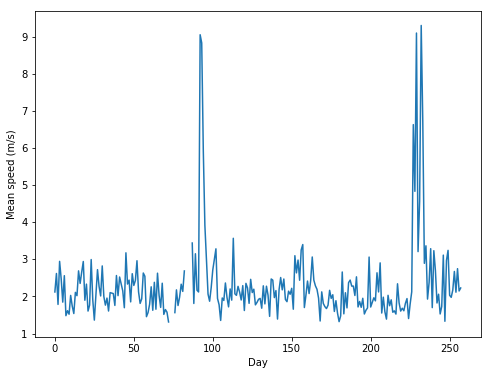

In [91]:
next_day = 1
inds = []
daily_mean_speed = []

# enumerate returns tuple containing index number and in this case time.

#loop over the data to calculate mean for every day and store the mean in daily_mean_speed list

for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day +=1
        inds =[]
        
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Mean speed (m/s)');
plt.savefig('res/img/day_mean_plot.png')

In [92]:
#CC: 4.2.5: Calculating Daily Mean Speed

sanne_data = bird_data[bird_data.bird_name == 'Sanne']
print(sanne_data.timestamp.head())

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
40920   2013-08-15 02:01:24
Name: timestamp, dtype: datetime64[ns]


## Video 4.2.6: Using the Cartopy Library

install cartophy:  
    ** conda install -c scitools cartopy **

In [93]:
# Import Modules:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Import Data
bird_data = pd.read_csv('res/data/bird_tracking.csv')


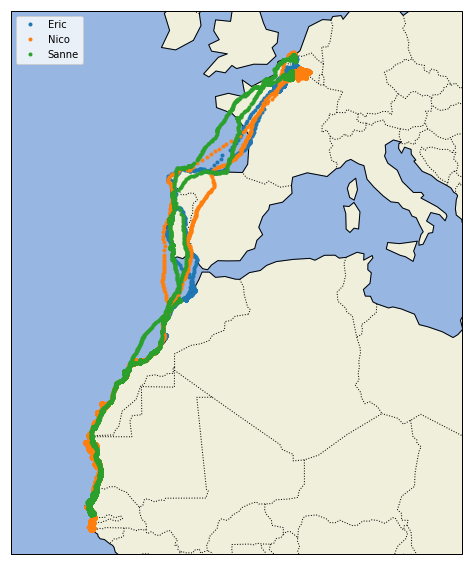

In [94]:
# Cartopy provides several different projection alternatives. In this case, 
# we'll be using one of the standard ones:
proj = ccrs.Mercator()

bird_names = pd.unique(bird_data.bird_name)

plt.figure(figsize=(10,10))
# create and set the extent of axes on the map.
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))

# add map details:
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# plot the data for birds using cartopy
for bird_name in bird_names:
    ix = bird_data.bird_name == bird_name
    x, y = bird_data.longitude[ix], bird_data.latitude[ix]
    ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=bird_name) # use specyfic transrorm form CCRS
           
plt.legend(loc='upper left');
plt.savefig('res/img/Geodetic_Map.png')